># Assignment 4

>Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

>This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Osasco, Sao Paulo, Brazil**, or **Brazil** more broadly.

>You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Osasco, Sao Paulo, Brazil** to Ann Arbor, USA. In that case at least one source file must be about **Osasco, Sao Paulo, Brazil**.

>You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

>Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

>As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

>Here are the assignment instructions:
>
* State the region and the domain category that your data sets are about (e.g., **Osasco, Sao Paulo, Brazil** and **religious events or traditions**).
* You must state a question about the domain category and region that you identified as being interesting.
* You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
* You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
* You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

>What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

>## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

>## Example
>Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## 0. Overview

First of all, I chose to use data from **São Paulo, São Paulo, Brazil**, the capital of state of São Paulo, due to the lack of data from Osasco. Osasco is a city in the greater São Paulo region, which makes it quite similar to São Paulo in terms of demographics. The data from the city will be compared with data from the entire country. I didn't find data about religion from São Paulo, but I found some really interesting time series about culture (public libraries) and human development index. I hope that you would like to see an analysis of these data :).

## 1. Question

The question I will answer is: **Was the size of books collections from public libraries among the subprefectures correlated with the Educational-Adjusted Human Development Index in the year of 2010 in the city of São Paulo?**

## 2. Datasets

The datases used in this analysis were found at [São Paulo Urban Planning and Licensing website](https://www.prefeitura.sp.gov.br/cidade/secretarias/licenciamento/). 

- **Public Library and Collection for the city, subprefectures and municipal districties - 2010**: This dataset brings data about the quantity of libraries and books available at different subprefectures and municipal districties of São Paulo. [Source](https://www.prefeitura.sp.gov.br/cidade/secretarias/upload/urbanismo/infocidade/htmls/6_disponibilidade_de_bibliotecas_publicas__2010_193.html)							
- **Municipal Human Development Index: Total and Wealth, Longevity and Education for the city, subprefectures and municipal districties - 2000 and 2010**: This dataset brings data about the HDI, WHDI, LHDI and EHDI ar different subprefectures of the city. [Source](https://www.prefeitura.sp.gov.br/cidade/secretarias/upload/urbanismo/infocidade/htmls/7_Indice_de_desenvolvimento_humano_municip_2000_10962.html)

The datasets are in .xls format and will be acessed by requests from my github repository.

## 3. Data treatment

Willing to create a good visualization of the data, I will load the datasets and treat them to make them "mergeable".

In [133]:
## Loading the hdi data
import requests 
import pandas as pd
url = 'https://github.com/gustavolopeso/plotting-coursera/blob/main/data/hdi_data.xls?raw=true'
r = requests.get(url)
open('temp.xls', 'wb').write(r.content)
hdi_df = pd.read_excel('temp.xls')
columns = hdi_df.iloc[4] 
columns_to_keep = ['Subprefecture','HDI','WHDI','LHDI','EHDI'] 
columns[0:5] = columns_to_keep
hdi_df.columns = columns
hdi_df = hdi_df[columns_to_keep].loc[6:36]
hdi_df.head()

4,Subprefecture,HDI,WHDI,LHDI,EHDI
6,Aricanduva / Vila Formosa,0.762,0.804,0.825,0.668
7,Butantã,0.789,0.876,0.842,0.665
8,Campo Limpo,0.699,0.76,0.823,0.546
9,Capela do Socorro,0.656,0.707,0.766,0.521
10,Casa Verde,0.732,0.769,0.827,0.616


In [134]:
## Loading the public libraries data
import requests
import pandas as pd
url = 'https://github.com/gustavolopeso/plotting-coursera/blob/main/data/pl_data.xls?raw=true'
r = requests.get(url)
open('temp.xls', 'wb').write(r.content)
pl_df = pd.read_excel('temp.xls')
columns = pl_df.iloc[4]
columns[0] = 'Region'
pl_df = pl_df.iloc[5:133]
pl_df.columns = columns
pl_df.head()

4,Region,Área Urb.(1),Requerido(2),Disponíveis,Carência,Acervo,Pop 15 ou +,Ac./pop
5,MSP,849.16,120.131,127,-6.86872,2651075,8.91551e+06,0.297355
6,Aricanduva/Formosa/Carrão,21.67,3.06567,4,-0.934329,136128,220979,1.78231
7,Aricanduva,6.02,0.851654,1,-0.148346,0,72526,0
8,Carrão,7.01,0.99171,1,-0.00829018,31318,69901,0.448034
9,Vila Formosa,8.64,1.22231,2,-0.777693,104810,78551.9,1.33428


As seen above, the public libraries dataset contains both information about the subprefectures and the districts. The subprefecture will be selected with help of the data from the HDI dataset, that carries only information about subprefectures. 

The data from the public libraries dataset is distributed as shown below:
- Subprefecture 1
    - 1st District of the subprefecture 1
    - 2nd District of the subprefecture 1
    - 3rd District of the subprefecture 1
    - ...
    - n District of the subprefecture 1
- ...
- Subprefecture m
    - 1st District of the subprefecture m
    - 2nd District of the subprefecture m
    - 3rd District of the subprefecture m
    - ...
    - n District of the subprefecture m
    
So, searching for the subprefecture name using the sequence of the public libraries dataset must be a valid way to gather the subprefectures data.

In [283]:
subprefectures = list(hdi_df['Subprefecture'])
subprefectures = [x.split('/')[0].strip().replace('’',"'") for x in subprefectures]
hdi_df['Subprefecture'] = subprefectures
i_list = []
for sub in subprefectures:
    flag = False
    for i, row in pl_df.iterrows():
        if sub in row['Region']:
            flag = True
            i_list.append(i)
            break
    if not(flag):
        for i, row in pl_df.iterrows():
            if ' '.join(sub.split(' ')[:-1]) in row['Region']:
                flag = True
                i_list.append(i)
                break
    if not(flag):
        print("I've failed finding the {} subprefecture".format(sub))
            

As seen, all subprefectures were found in the public libraries dataset!

In [136]:
pl_df = pl_df.loc[i_list]
pl_df['Subprefecture'] = subprefectures
hdi_df.head()

4,Subprefecture,HDI,WHDI,LHDI,EHDI
6,Aricanduva,0.762,0.804,0.825,0.668
7,Butantã,0.789,0.876,0.842,0.665
8,Campo Limpo,0.699,0.76,0.823,0.546
9,Capela do Socorro,0.656,0.707,0.766,0.521
10,Casa Verde,0.732,0.769,0.827,0.616


In [137]:
df = pd.merge(pl_df,hdi_df,on='Subprefecture')
df.columns = [x.strip() for x in df.columns]
df = df[['Subprefecture','Área Urb.(1)','Requerido(2)','Disponíveis','Acervo','Pop 15 ou +','HDI','WHDI','LHDI','EHDI']]
df.columns = ['SubPref','Area','ReqQty','AcQty','Collection','PopOver15','HDI','WHDI','LHDI','EHDI']
df['QtyPerPP'] = df['AcQty']/df['PopOver15']*100000
df['AvgCol'] = df['Collection']/df['AcQty']
df['ColPerPP'] = df['Collection']/df['PopOver15']*1000

def aux_func(x):
    if x['AcQty'] > x['ReqQty']:
        return True
    return False

df['ReqAch'] = df.apply(lambda x: aux_func(x),axis=1)
for col in df.columns[1:-1]:
    df[col] = df[col].apply(lambda x: float(x))
df = df.set_index('SubPref')
df.head()

,Area,ReqQty,AcQty,Collection,PopOver15,HDI,WHDI,LHDI,EHDI,QtyPerPP,AvgCol,ColPerPP,ReqAch
SubPref,,,,,,,,,,,,,
Aricanduva,21.67,3.065671,4.0,136128.0,220978.887882,0.762,0.804,0.825,0.668,1.810128,34032.000000,616.022650,True
Butantã,49.44,6.994313,3.0,29010.0,344930.630917,0.789,0.876,0.842,0.665,0.869740,9670.000000,84.103867,False
Campo Limpo,36.51,5.165096,8.0,57494.0,460076.248398,0.699,0.760,0.823,0.546,1.738842,7186.750000,124.966242,True
Capela do Socorro,32.36,4.577993,7.0,46668.0,450605.215600,0.656,0.707,0.766,0.521,1.553466,6666.857143,103.567376,True
Casa Verde,22.45,3.176018,2.0,31428.0,245309.199929,0.732,0.769,0.827,0.616,0.815298,15714.000000,128.115864,False


## 4. Analysis/Plotting

Just a quick explaining about the columns:
- *SubPref*: Name of the subprefecture.
- *Area*: Area, in km², of the subprefecture region.
- *ReqQty*: Required minimal quantity of public libraries according to UNESCO
- *AcQty*: Public libraries quantit
- *Collection*: Quantity of books/magazines in the public libraries.
- *PopOver15*: Number of people that is older than 15 years old.
- *HDI*: Human Development Index
- *WHDI*: Wealth-adjusted Human Development Index
- *LHDI*: Longevity-adjusted Human Development Index
- *EHDI*: Education-adjusted Human Development Index
- *QtyPerPP*: Number of libraries per 100000 habitants.
- *AvgCol*: Average number of books per library.
- *ColPerPP*: Number of books/magazines per 1000 habitants.
- *ReqAch*: True if the subprefecture has sufficient public libraries, False if not.

I'm interested in analysing the correlation between ***EHDI*** and ***ColPerPP***.

In [138]:
%matplotlib notebook

<IPython.core.display.Javascript object>


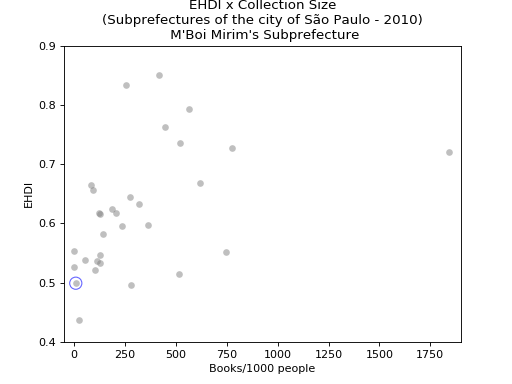

In [306]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.xlabel('Books/1000 people')
plt.ylabel('EHDI')
sc = plt.scatter(df['ColPerPP'],df['EHDI'],picker=5,label='Sufficient Quantity of libraries',color='grey',alpha=0.5,lw=0)
plt.gca().set_title("EHDI x Collection Size\n(Subprefectures of the city of São Paulo - 2010)\n Click to interact!")
plt.grid(False)
plt.gca().set_xlim(-50, 1900)
plt.gca().set_ylim(0.4,0.9)
sc2 = plt.scatter(500,0.6,c='w',alpha=0.6)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='450000',
                          markerfacecolor='grey',alpha=0.5, markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='300000',
                          markerfacecolor='grey',alpha=0.5, markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='150000',
                          markerfacecolor='grey', alpha=0.5, markersize=5),]

def onpick(event):
    ax.cla()
    plt.xlabel('Books/1000 people')
    plt.ylabel('EHDI')
    sc = plt.scatter(df['ColPerPP'],df['EHDI'],picker=5,label='Sufficient Quantity of libraries',color='grey',alpha=0.5,lw=0)
    plt.gca().set_title("EHDI x Collection Size\n(Subprefectures of the city of São Paulo - 2010)\n Click to interact!")
    plt.grid(False)
    x = df.iloc[event.ind[0]]['ColPerPP']
    y = df.iloc[event.ind[0]]['EHDI']
    sc2 = plt.scatter(x,y,marker = 'o',facecolors='none',s=120,edgecolors='b',alpha=0.6)
    origin = df.iloc[event.ind[0]].name
    plt.gca().set_title("EHDI x Collection Size\n(Subprefectures of the city of São Paulo - 2010)\n {}'s Subprefecture".format(origin))
    plt.gca().set_xlim(-50, 1900)
    plt.gca().set_ylim(0.4,0.9)

plt.gcf().canvas.mpl_connect('pick_event', onpick)
plt.show()

In [301]:
df.loc['Sé']

Area            26.61
ReqQty        3.76454
AcQty              11
Collection     690707
PopOver15      374977
HDI             0.831
WHDI            0.931
LHDI            0.854
EHDI            0.721
QtyPerPP      2.93351
AvgCol        62791.5
ColPerPP         1842
ReqAch           True
Name: Sé, dtype: object

In [302]:
df.describe()

,Area,ReqQty,AcQty,Collection,PopOver15,HDI,WHDI,LHDI,EHDI,QtyPerPP,AvgCol,ColPerPP
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,27.065161,3.828928,4.064516,85518.548387,281234.935138,0.728097,0.776581,0.805903,0.619226,1.549707,19883.252810,312.255387
std,10.632178,1.504142,2.322864,123491.407897,101561.426358,0.084822,0.104034,0.045009,0.103785,0.919791,15905.975489,357.919812
min,5.360000,0.758283,1.000000,0.000000,101078.206452,0.593000,0.645000,0.734000,0.436000,0.317924,0.000000,0.000000
25%,19.335000,2.735337,2.000000,31639.500000,210718.303355,0.657000,0.695000,0.764000,0.537500,0.943050,8428.375000,108.564721
50%,26.610000,3.764536,4.000000,55780.000000,279428.620250,0.718000,0.760000,0.823000,0.616000,1.457880,15925.500000,204.806329
75%,35.420000,5.010893,5.000000,105323.500000,359953.829819,0.775500,0.842500,0.836000,0.666500,1.795216,28999.083333,432.898331
max,49.440000,6.994313,11.000000,690707.000000,460076.248398,0.910000,1.000000,0.886000,0.851000,4.614597,62791.545455,1841.998168


As we can see, Sé's subprefecture is an outlier. Sé has the largest collection and the largest number of libraries among the subprefectures. Sé is located in the "historic center of São Paulo" and it's closely related to the story and the culture of São Paulo, being the oldest neighborhood from São Paulo, founded at 1554. In this subprefecture we can find some of the most important libraries from Brazil, like "Mário de Andrade Library", the largest library in São Paulo, named after Mário de Andrade, one of the founders of the Brazilian Modernism.

For evaluating the correlation between the collection size and the EHDI, I will remove Sé from the data, due to the fact that it's not a "typical" subprefecture from São Paulo.

In [303]:
df2 = df.loc[df['ColPerPP']<1500]

<IPython.core.display.Javascript object>


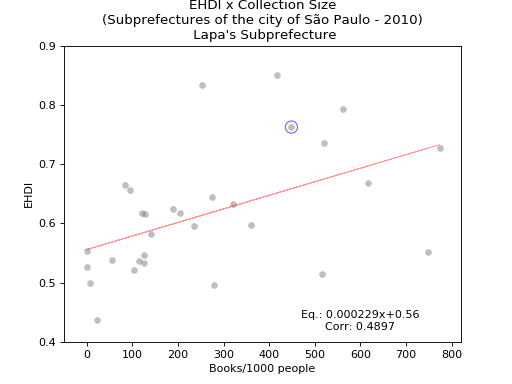

In [307]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
corr = df2[['ColPerPP','EHDI']].corr()['ColPerPP']['EHDI']
m,b = np.polyfit(df2['ColPerPP'],df2['EHDI'], 1)
xlr = np.array(df2['ColPerPP'])
ylr = m*x+b
fig, ax = plt.subplots()
plt.xlabel('Books/1000 people')
plt.ylabel('EHDI')
sc = plt.scatter(df2['ColPerPP'],df2['EHDI'],picker=5,label='Sufficient Quantity of libraries',color='grey',alpha=0.5,lw=0)
plt.plot(x,y,antialiased=True,lw=0.5,alpha=0.4,c='r')
plt.gca().set_title("EHDI x Collection Size\n(Subprefectures of the city of São Paulo - 2010)\n Click to interact!")
plt.grid(False)
sc2 = plt.scatter(500,0.6,c='w',alpha=0.6)
plt.gca().set_xlim(-50, 820)
plt.gca().set_ylim(0.4,0.9)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='450000',
                          markerfacecolor='grey',alpha=0.5, markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='300000',
                          markerfacecolor='grey',alpha=0.5, markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='150000',
                          markerfacecolor='grey', alpha=0.5, markersize=5),]
plt.text(600,0.42,"Eq.: {0:.6f}x+{1:0.2}\nCorr: {2:.4f}".format(m,b,corr),horizontalalignment='center')

def onpick(event):
    ax.cla()
    plt.xlabel('Books/1000 people')
    plt.ylabel('EHDI')
    sc = plt.scatter(df2['ColPerPP'],df2['EHDI'],picker=5,label='Sufficient Quantity of libraries',color='grey',alpha=0.5,lw=0)
    plt.plot(xlr,ylr,antialiased=True,lw=0.5,alpha=0.4,c='r')
    plt.gca().set_title("EHDI x Collection Size\n(Subprefectures of the city of São Paulo - 2010)\n Click to interact!")
    plt.grid(False)
    x = df2.iloc[event.ind[0]]['ColPerPP']
    y = df2.iloc[event.ind[0]]['EHDI']
    sc2 = plt.scatter(x,y,marker = 'o',facecolors='none',s=120,edgecolors='b',alpha=0.6)
    origin = df2.iloc[event.ind[0]].name
    plt.gca().set_xlim(-50, 820)
    plt.gca().set_ylim(0.4,0.9)
    plt.text(600,0.42,"Eq.: {0:.6f}x+{1:0.2}\nCorr: {2:.4f}".format(m,b,corr),horizontalalignment='center')
    plt.gca().set_title("EHDI x Collection Size\n(Subprefectures of the city of São Paulo - 2010)\n {}'s Subprefecture".format(origin))
    
plt.gcf().canvas.mpl_connect('pick_event', onpick)
plt.show()

Removing Sé from the data, we got almost **50%** of correlation, which can be considered a low to moderate correlation coefficient.

## 5. Discussion

This correlation is expected, since a higher EHDI is probably correlated with higher public investments, which makes it possible to build and maintain public libraries and large collections.

São Paulo can be considered a portrait of Brazil, having, according to 2020 data, 12,33 million habitants, almost 50% coming from other cities or even states in Brazil. Unfortunately, São Paulo also portrays the high brazilian inequality. Pinheiros' (where the mean income is about R\$ 7.000,00) EHDI is almost twice Paralheiro's (where the mean income is about R\$ 1.800,00).

This kind of visualization could help the government to make decisions about how to invest money and inform people about the inequality of access to culture in the different subprefectures of the city and how this affects the EHDI, so that they can demand from their governments measures to improve the city's education indices.